# distingir entre dos presidentes

Limpieza y Analisis de los datos

In [24]:
import pandas as pd 
import numpy as np

nestor = pd.read_parquet('df_nestor.parquet')
cristina = pd.read_parquet('df_cristina.parquet')

In [25]:
nestor.head(10)

,frase,presidente
0,"Quiero agradecer, como santacruceño, la presen...",Nestor
1,"Tambièn para el compañero y amigo mendocino, ...",Nestor
2,,Nestor
3,Me siento profundamente emocionado de volver a...,Nestor
4,Y quiero decirles -y otra vez se van a dar cu...,Nestor
5,,Nestor
6,Acá están aquellos cariños de vida; acá están ...,Nestor
7,"Vengo como un argentino más, como un santacru...",Nestor
8,,Nestor
9,Estos gobernadores que están presentes aquí vi...,Nestor


In [26]:
cristina.head()

,frase,presidente
0,,cristina
1,"Algunas cosas de lo que dijo Javi, Aerolíneas ...",cristina
2,Este latiguillo que están todo el día del déf...,cristina
3,"Pero, en el balance de Aerolíneas, en el bala...",cristina
4,"Entonces, me parece que en ese balance de AA ...",cristina


Uniendo Dataframe

In [27]:
data = pd.concat([nestor, cristina])

In [28]:
data[data['frase']== '\xa0']

,frase,presidente
28,,Nestor
29,,Nestor
33,,Nestor
35,,Nestor
92,,Nestor
93,,Nestor
95,,Nestor
139,,Nestor
142,,Nestor
145,,Nestor


In [61]:
i_df = data[data['frase']== ' '].index

data.drop(i_df , inplace=True)

In [62]:
i_df2 = data[data['frase']== '\xa0'].index

data.drop(i_df2, inplace=True)

In [63]:
data

,frase,presidente
1,"Tambièn para el compañero y amigo mendocino, ...",Nestor
3,Me siento profundamente emocionado de volver a...,Nestor
4,Y quiero decirles -y otra vez se van a dar cu...,Nestor
6,Acá están aquellos cariños de vida; acá están ...,Nestor
7,"Vengo como un argentino más, como un santacru...",Nestor
...,...,...
1626,Lo que tenía que decir al final,cristina
1627,No lo dije todavía,cristina
1628,Ahora lo voy a decir,cristina
1629,Declaro formalmente inaugurada la decimocuart...,cristina


In [64]:
#%pip install nltk

In [65]:
import nltk
#descargamos informacion necesaria
#nltk.download('stopwords')

In [66]:
from nltk.corpus import stopwords

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

KeyError: ' No, no, no'

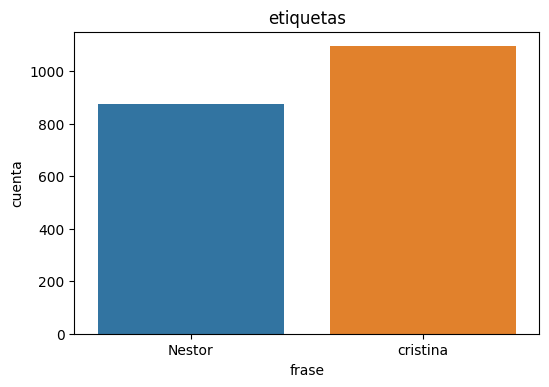

In [68]:
fig = plt.figure(dpi=100)
ax = fig.gca()
sns.countplot(x=data.presidente, data=data.frase, ax=ax)
ax.set_title("etiquetas")
ax.set_xlabel("frase")
ax.set_ylabel("cuenta")


porcentaje = (data.frase.value_counts() / len(data)).to_dict()
xs ={label.get_text(): idx for idx, label in enumerate(ax.get_xticklabels())}
for label, pct in porcentaje.items():
    ax.text(xs[label],11000, f"{pct:0.2%}", ha="center", fontsize="xx-large", c="white")
    pass

In [69]:
#desarrollar un grafico de violin para ver el largo de las frases

In [70]:
data.to_parquet('df_presindencial.parquet')

In [71]:
df = pd.read_parquet('df_presindencial.parquet')

In [72]:
df

,frase,presidente
index,,
1,"Tambièn para el compañero y amigo mendocino, ...",Nestor
3,Me siento profundamente emocionado de volver a...,Nestor
4,Y quiero decirles -y otra vez se van a dar cu...,Nestor
6,Acá están aquellos cariños de vida; acá están ...,Nestor
7,"Vengo como un argentino más, como un santacru...",Nestor
...,...,...
1626,Lo que tenía que decir al final,cristina
1627,No lo dije todavía,cristina
1628,Ahora lo voy a decir,cristina


Dividir el Data Set

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
rest, test = train_test_split(df, test_size=0.2, stratify=df['presidente'])

In [75]:
train, val= train_test_split(rest, test_size=0.2, stratify=rest['presidente'])

In [76]:
print('ejemplos para entrenar: ',len(train),'\n','ejemplos para modelar: ',len(val),'\n','ejemplos para validacion: ',len(test))

ejemplos para entrenar:  1260 
 ejemplos para modelar:  316 
 ejemplos para validacion:  394


Guardar los tres conjuntos:

In [77]:
frase_train = train['frase']
frase_val =  val['frase']
frase_test = test['frase']

etiquetas:

In [78]:
target_train= train['presidente']
target_val= val['presidente']
target_test= test['presidente']

In [79]:
target_val


index
238       Nestor
598     cristina
173       Nestor
1599    cristina
1084      Nestor
          ...   
436     cristina
323       Nestor
523     cristina
361       Nestor
998     cristina
Name: presidente, Length: 316, dtype: object

# Feature Engineering

empezamos a escribir el codigo ML

In [80]:
#convertir nuestras etiquetas a numeros
train_y = np.where(target_train == 'Nestor', 1,0) 
val_y = np.where(target_val == 'Nestor', 1,0) 
test_y = np.where(target_test == 'Nestor', 1,0) 

In [81]:
train_y

array([1, 1, 1, ..., 1, 0, 1])

In [82]:
#texto

In [83]:
ejemplo = frase_train.iloc[200]

In [85]:
ejemplo

' Se ha restablecido el pleno derecho de los padres a reconocer a sus hijos, derogando un impedimento vigente y se sacaron exigencias que basándose en características meramente estéticas, hacían de los requisitos de ingreso a las instituciones militares un caso concreto de discriminación por motivos inadmisibles en un contexto democrático respetuoso de la dignidad humana'

In [86]:
from nltk.tokenize.toktok import ToktokTokenizer
tk_tokenizer = ToktokTokenizer()
tokens = tk_tokenizer.tokenize(ejemplo)

In [87]:
tokens

['Se',
 'ha',
 'restablecido',
 'el',
 'pleno',
 'derecho',
 'de',
 'los',
 'padres',
 'a',
 'reconocer',
 'a',
 'sus',
 'hijos',
 ',',
 'derogando',
 'un',
 'impedimento',
 'vigente',
 'y',
 'se',
 'sacaron',
 'exigencias',
 'que',
 'basándose',
 'en',
 'características',
 'meramente',
 'estéticas',
 ',',
 'hacían',
 'de',
 'los',
 'requisitos',
 'de',
 'ingreso',
 'a',
 'las',
 'instituciones',
 'militares',
 'un',
 'caso',
 'concreto',
 'de',
 'discriminación',
 'por',
 'motivos',
 'inadmisibles',
 'en',
 'un',
 'contexto',
 'democrático',
 'respetuoso',
 'de',
 'la',
 'dignidad',
 'humana']

- simbolos de puntuacion 
- stopwords
- acentos(tildes)

limpiar y extraer la informacion mas util

In [12]:
%pip install unidecode

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 2.5 MB/s eta 0:00:00m eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [88]:
from nltk.corpus import stopwords
import unidecode
import string
sp_stopwords = stopwords.words("spanish") # stopwords del idioma español


In [89]:
sp_stopwords # stopwords del idioma español

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [4]:
# limpieza modulo string para puntuacion 

In [5]:
sp_puntuacion = string.punctuation + '¿¡'

In [18]:
sp_puntuacion

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~¿¡'

In [90]:
no_deseados = set((unidecode.unidecode(word) for word in sp_stopwords))| set(sp_puntuacion)

In [91]:
no_deseados

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eramos',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estabamos',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estais',
 'estamos',
 'estan',
 'estando',
 'estar',
 'estara',
 'estaran',
 'estaras',
 'estare',
 'estareis',
 'estaremos',
 'estaria',
 'estariais',
 'estariamos',
 'estarian',
 'estarias',
 'estas',
 'este',
 'esteis',
 'estemos',
 'esten',
 'estes',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieramos',
 'estuvieran',
 'estuvieras',
 'estu

In [110]:
tk_tokenisador = ToktokTokenizer()

def tokenise(sentence):
    """funcion devuelve las palabras limpias de una frase sin los acentos conectores o caracteres especiales
        >>> ejemplo
        >>> ' Se ha restablecido el pleno derecho de los padres a reconocer a sus hijos, derogando un impedimento vigente y se sacaron exigencias que basándose en características meramente estéticas, hacían de los requisitos de ingreso a las instituciones militares un caso concreto de discriminación por motivos inadmisibles en un contexto democrático respetuoso de la dignidad humana'
        >>>tokenise(ejemplo)
        >>> ['restablecido',
 'pleno',
 'derecho',
 'padres',
 'reconocer',
 'hijos',
 'derogando',
 'impedimento',
 'vigente',
 'sacaron',
 'exigencias',
 'basandose',
 'caracteristicas',
 'meramente',
 'esteticas',
 'hacian',
 'requisitos',
 'ingreso',
 'instituciones',
 'militares',
 'caso',
 'concreto',
 'discriminacion',
 'motivos',
 'inadmisibles',
 'contexto',
 'democratico',
 'respetuoso',
 'dignidad',
 'humana']"""
 
    limpia = []
    clean_sentence = unidecode.unidecode(sentence) # eliminar acentos
    for token_ in tk_tokenizer.tokenize(clean_sentence):
        token = token_.lower()
        if token in no_deseados:
            continue
        limpia.append(token)
    return limpia

## convertimos en numeros Vectorizacion

one-hot encoding

In [144]:
from sklearn.feature_extraction.text import CountVectorizer #submodulo dedicado completamente a texto

In [145]:
vectorizador_real = CountVectorizer(binary=True, analyzer=tokenise) #pasamos la funcion tokenise convierte nuestro texto a vector 1, 0

In [146]:
vectorizador_real.fit(frase_train) #entrenando

CountVectorizer(analyzer=<function tokenise at 0x7f859aceedc0>, binary=True)

In [147]:
#transformamos todos los vectores

In [148]:
train_x = vectorizador_real.transform(frase_train)
val_x = vectorizador_real.transform(frase_val)
test_x = vectorizador_real.transform(frase_test)

## modelado

modelo de regrecion logistica

In [174]:
from sklearn.linear_model import LogisticRegression
#crear objeto logisticRegresion

lr = LogisticRegression()

In [175]:
#le decimos a fit que entrene el modelo utilizando los datos de entrada ya pasados a numeros y utilizamos las etiquetas para evaluar

In [176]:
train_x.shape, train_y.shape

((1260, 5191), (1260,))

In [177]:
lr.fit(train_x, train_y)

LogisticRegression()

In [178]:
train_pred = lr.predict(train_x) #diagnosticar overfitting

In [180]:
val_pred = lr.predict(val_x) #decidir cambios sobre el modelado

In [181]:
train_pred

array([1, 1, 1, ..., 1, 0, 1])

# elegimos la metrica

Accuracy

In [183]:
from sklearn.metrics import accuracy_score, classification_report

verificamos que no alla overfitting o underfitting


In [189]:
accuracy_score(train_y, train_pred)

0.9857142857142858

verificamos que no alla overfitting o underfitting

In [190]:
accuracy_score(val_pred, val_y) #conjunto de validacion

0.8386075949367089

In [191]:
test_pred = lr.predict(test_x)

In [192]:
test_accuracy = accuracy_score(test_y, test_pred)

In [197]:
print(f"test accuracy= {test_accuracy:0.2%}")

test accuracy= 84.26%


ejemplo

In [224]:
oracion = "Desconfío de los que no les gusta mirar el pasado, será porque no les gusta lo que hicieron en el pasado"

In [225]:
own_x = vectorizador_real.transform([oracion])

In [226]:
result = lr.predict(own_x)

In [227]:
result

array([0])

In [228]:
Cristina, Nestor = lr.predict_proba(own_x).squeeze()*100

In [229]:
print("Resultado de la prediccion: Cristina:", Cristina , "Nestor",Nestor)

Resultado de la prediccion: Cristina: 71.93943321689898 Nestor 28.06056678310103


In [230]:
import matplotlib.pyplot as plt